# Importing the raw data

In [80]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics

In [81]:
file = './data_for_training2022-04-19.csv'
basedf = pd.read_csv(file, index_col=False)

basedf = basedf.reset_index()
basedf['content']

0                               Mi történt a választáson?
1        A Mandiner a magyar nyilvánosság neves szerep...
2        Újabb interjúalanyunk: Dörner György színművé...
3                                                     ***
4       Milyen érzelmet váltott ki önből, hogy ekkora ...
                              ...                        
1349                                       A telefonszám:
1350                                       06-30-288-6174
1351                                     Keressen minket!
1352    A telefonszámon hívásokra nem válaszolunk, ha ...
1353                                              hu@hvg.
Name: content, Length: 1354, dtype: object

In [82]:
#Changing nan writer values to 'Unknown'

basedf['writer'] = basedf['writer'].replace(np.nan, 'Unknown')


In [83]:
writers = []
writers = basedf['writer'].unique()

for i in range(len(basedf['writer'])):
    writerindex = np.where(writers == basedf['writer'][i])
    basedf['writer'][i] = writerindex[0][0]

#basedf['writer']

C:\Users\simon\AppData\Local\Temp/ipykernel_26480/3037653877.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basedf['writer'][i] = writerindex[0][0]


In [84]:
sites = []
sites = basedf['site'].unique()

for i in range(len(basedf['site'])):
    siteindex = np.where(sites == basedf['site'][i])
    basedf['site'][i] = siteindex[0][0]

basedf['site']

C:\Users\simon\AppData\Local\Temp/ipykernel_26480/413617624.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basedf['site'][i] = siteindex[0][0]


0       0
1       0
2       0
3       0
4       0
       ..
1349    2
1350    2
1351    2
1352    2
1353    2
Name: site, Length: 1354, dtype: object

In [85]:
basedf['sentencelabel'] = 0
temp= 'doccano_text.csv'
doccano_alldata = pd.read_csv(temp)

basedf['sentencelabel']=doccano_alldata['label']

labelingdf = basedf[['content', 'sentencelabel']]


#from datetime import datetime
#labelingdf.to_csv('data_for_labeling' + datetime.today().strftime('%Y-%m-%d') + '.csv', index=False)

basedf

,index,title,site,date,writer,content,comments,label,sentencelabel
0,0,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,Mi történt a választáson?,NaN,0,1
1,1,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,A Mandiner a magyar nyilvánosság neves szerep...,NaN,0,1
2,2,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,Újabb interjúalanyunk: Dörner György színművé...,NaN,0,1
3,3,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,***,NaN,0,2
4,4,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,"Milyen érzelmet váltott ki önből, hogy ekkora ...",NaN,0,2
...,...,...,...,...,...,...,...,...,...
1349,1349,Itthon: Elmondana nekünk valamit? Üzenjen What...,2,2022. április. 16. 11:10,1,A telefonszám:,NaN,0,1
1350,1350,Itthon: Elmondana nekünk valamit? Üzenjen What...,2,2022. április. 16. 11:10,1,06-30-288-6174,NaN,0,1
1351,1351,Itthon: Elmondana nekünk valamit? Üzenjen What...,2,2022. április. 16. 11:10,1,Keressen minket!,NaN,0,1
1352,1352,Itthon: Elmondana nekünk valamit? Üzenjen What...,2,2022. április. 16. 11:10,1,"A telefonszámon hívásokra nem válaszolunk, ha ...",NaN,0,2


In [86]:
basedf['label'][4]
ideiglenes_poz=0
ideiglenes_neg=0
for i in range(len(basedf['label'])):
    if basedf['sentencelabel'][i]==1:
        ideiglenes_poz=ideiglenes_poz+1
    else:
        ideiglenes_neg=ideiglenes_neg+1
print(len(basedf['title']))
print(ideiglenes_poz)
print(ideiglenes_neg)
#basedf

1354
715
639


In [87]:
titles = []
titles = basedf['title'].unique()
print(len(titles))
sum=[]
sum=np.zeros(len(titles))
#print(titles)
type(titles)
print(titles[0])

for i in range(len(basedf['label'])):
    for k in range(len(titles)):
        if basedf['title'][i]==titles[k]:
            sum[k]=sum[k]+1
print(sum)

59
Az ellenzéki szavazóknak is jobb, hogy így alakult – Dörner György a Mandinernek
[ 27.  18.   7.  13.  31.  14.   8.  45.  13.  59. 151.   8.  11.  35.
  10.  27.  11.  10.   5.  11.  37.  31.  44.  22.  41.  16.  13.  32.
  47.  42.   8.  38.  14.   8.  16.  32.  66.  58.  25.  32.   3.   6.
  15.  14.   8.   9.  15.  16.  14.  11.  15.  13.  13.   6.   7.  12.
  15.  15.  11.]


In [89]:
x=0
tomb=[]
tomb=np.empty(len(basedf['title']), dtype=object)
for n in range(len(sum)):
    for i in range(int(sum[n])):
        tomb[x]=sum[n]
        x=x+1

#print(tomb)    
print(basedf['title'])

0       Az ellenzéki szavazóknak is jobb, hogy így ala...
1       Az ellenzéki szavazóknak is jobb, hogy így ala...
2       Az ellenzéki szavazóknak is jobb, hogy így ala...
3       Az ellenzéki szavazóknak is jobb, hogy így ala...
4       Az ellenzéki szavazóknak is jobb, hogy így ala...
                              ...                        
1349    Itthon: Elmondana nekünk valamit? Üzenjen What...
1350    Itthon: Elmondana nekünk valamit? Üzenjen What...
1351    Itthon: Elmondana nekünk valamit? Üzenjen What...
1352    Itthon: Elmondana nekünk valamit? Üzenjen What...
1353    Itthon: Elmondana nekünk valamit? Üzenjen What...
Name: title, Length: 1354, dtype: object


In [90]:
sum_array=np.zeros((len(sum)+1), dtype=int)
x=0
for i in range(1,len(sum)+1):
    sum_array[i]=sum_array[i-1]+sum[i-1]
    x=x+1
sum_array

array([   0,   27,   45,   52,   65,   96,  110,  118,  163,  176,  235,
        386,  394,  405,  440,  450,  477,  488,  498,  503,  514,  551,
        582,  626,  648,  689,  705,  718,  750,  797,  839,  847,  885,
        899,  907,  923,  955, 1021, 1079, 1104, 1136, 1139, 1145, 1160,
       1174, 1182, 1191, 1206, 1222, 1236, 1247, 1262, 1275, 1288, 1294,
       1301, 1313, 1328, 1343, 1354])

In [91]:
sentence_length=np.zeros(len(basedf['label']))
positive_sentences=np.zeros(len(basedf['label']))
negative_sentences=np.zeros(len(basedf['label']))
positive_sentences=positive_sentences.tolist()
negative_sentences=negative_sentences.tolist()
sum_pos=np.zeros((60), dtype=int)
sum_neg=np.zeros((60), dtype=int)
helper_sum_pos=np.zeros(len(basedf['label']))
helper_sum_neg=np.zeros(len(basedf['label']))

In [92]:
k=0

while k<len(sum_array)-1:
    for i in range(int(sum_array[k]),int(sum_array[k+1])):
    
        if basedf['sentencelabel'][i]==1:
           
            sum_pos[k]=sum_pos[k]+1
        
        else:
          
            sum_neg[k]=sum_neg[k]+1

         
    for i in range(int(sum_array[k]),int(sum_array[k+1])): 
        if sum_pos[k]>sum_neg[k]:
            basedf['label'][i]=1
        else:
            basedf['label'][i]=2
        helper_sum_pos[i]=sum_pos[k]
        helper_sum_neg[i]=sum_neg[k]
    k=k+1 

C:\Users\simon\AppData\Local\Temp/ipykernel_26480/3716498339.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basedf['label'][i]=2
C:\Users\simon\AppData\Local\Temp/ipykernel_26480/3716498339.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basedf['label'][i]=1


In [93]:
basedf['sentence_length']=tomb
basedf['positive_sentences']=helper_sum_pos
basedf['negative_sentences']=helper_sum_neg
basedf

,index,title,site,date,writer,content,comments,label,sentencelabel,sentence_length,positive_sentences,negative_sentences
0,0,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,Mi történt a választáson?,NaN,2,1,27.0,12.0,15.0
1,1,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,A Mandiner a magyar nyilvánosság neves szerep...,NaN,2,1,27.0,12.0,15.0
2,2,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,Újabb interjúalanyunk: Dörner György színművé...,NaN,2,1,27.0,12.0,15.0
3,3,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,***,NaN,2,2,27.0,12.0,15.0
4,4,"Az ellenzéki szavazóknak is jobb, hogy így ala...",0,2022. április 18. 13:00,0,"Milyen érzelmet váltott ki önből, hogy ekkora ...",NaN,2,2,27.0,12.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1349,Itthon: Elmondana nekünk valamit? Üzenjen What...,2,2022. április. 16. 11:10,1,A telefonszám:,NaN,2,1,11.0,5.0,6.0
1350,1350,Itthon: Elmondana nekünk valamit? Üzenjen What...,2,2022. április. 16. 11:10,1,06-30-288-6174,NaN,2,1,11.0,5.0,6.0
1351,1351,Itthon: Elmondana nekünk valamit? Üzenjen What...,2,2022. április. 16. 11:10,1,Keressen minket!,NaN,2,1,11.0,5.0,6.0
1352,1352,Itthon: Elmondana nekünk valamit? Üzenjen What...,2,2022. április. 16. 11:10,1,"A telefonszámon hívásokra nem válaszolunk, ha ...",NaN,2,2,11.0,5.0,6.0


In [94]:
X_new=basedf[['positive_sentences','negative_sentences','sentence_length']].values
Y_new=basedf['label'].values
Y_new=Y_new.astype('int')
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y_new,test_size=0.3,random_state=6)
from sklearn.ensemble import RandomForestClassifier
model_new=RandomForestClassifier(n_estimators=10,random_state=20)
model_new.fit(X_train, Y_train)
prediction_test=model_new.predict(X_test)
y_pred_proba = model_new.predict_proba(X_test)[::,1]
print('Accuracy :',metrics.accuracy_score(Y_test,prediction_test))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_proba, pos_label=2)
new_classification_auc=metrics.roc_auc_score(Y_test, y_pred_proba)

Accuracy : 1.0


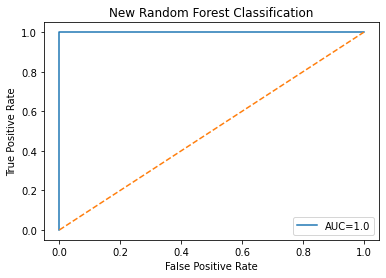

In [95]:
plt.plot(fpr,tpr,label="AUC="+str(new_classification_auc))
plt.plot([0, 1], linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('New Random Forest Classification')
plt.show()

Text(0.5, 1.0, 'New Random Forest Classification model')

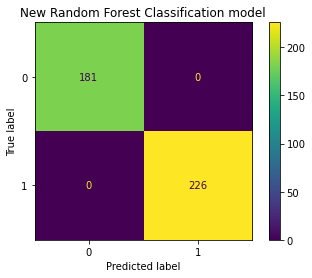

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, prediction_test)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('New Random Forest Classification model')

Classification

In [97]:
Y=basedf['label'].values
Y=Y.astype('int')
X=basedf[['sentencelabel','writer','site']].values
#X=X.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=6)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,random_state=10)
model.fit(X_train, Y_train)
prediction_test=model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[::,1]
print('Accuracy :',metrics.accuracy_score(Y_test,prediction_test))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_proba, pos_label=2)

classification_auc=metrics.roc_auc_score(Y_test, y_pred_proba)

Accuracy : 0.8782287822878229


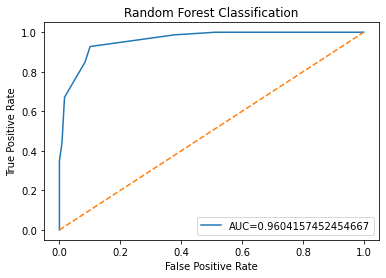

0.9604157452454667


In [98]:
plt.plot(fpr,tpr,label="AUC="+str(classification_auc))
plt.plot([0, 1], linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('Random Forest Classification')
plt.show()
print(classification_auc)

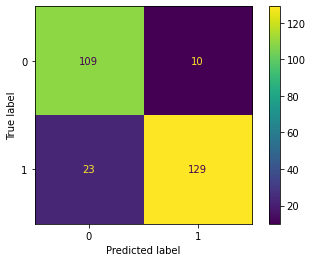

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, prediction_test)

cm_display = ConfusionMatrixDisplay(cm).plot()

Linear Regression: Author-Sentence truth

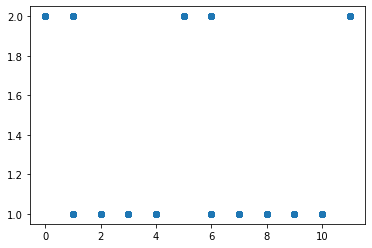

In [19]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

Y=basedf['label'].values
Y=Y.astype('int')
X=basedf['writer'].values
X=X.reshape(-1,1)
plt.scatter(X,Y)
#plt.show()

In [ ]:
# #Checking writer index output
# basedf.to_csv('writerindex.csv', index=False)

# print(basedf)

Accuracy:  0.02535682227490177
1.6075182352269468
[-0.02636049]


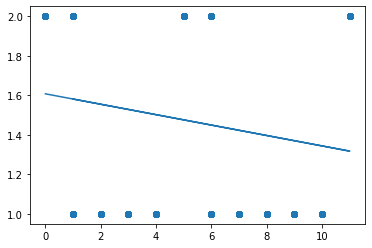

In [20]:
model=LinearRegression()
model=model.fit(X,Y)
r_sq=model.score(X,Y)
print("Accuracy: ",r_sq)
b_0=model.intercept_
b_1=model.coef_
print(b_0)  
print(b_1)
regression_line=b_1*X+b_0
plt.scatter(X,Y)
plt.plot(X,regression_line)

Logistic Regression

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [101]:
Y=basedf['label'].values
Y=Y.astype('int')

# basedf.author[basedf.author=="Nagy Gábor"]=1
# basedf.author[basedf.author=="Ismeretlen"]=0

X=basedf[['sentencelabel','writer','site']].values
logistic_regression=LogisticRegression()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=45)

logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)
y_pred_proba = logistic_regression.predict_proba(X_test)[::,1]
confusion_matrix=pd.crosstab(Y_test,Y_pred,rownames=['Actual'],colnames=['Predicted'])
print(confusion_matrix)
print(metrics.accuracy_score(Y_test,Y_pred))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_proba, pos_label=2)

logistic_auc=metrics.roc_auc_score(Y_test, y_pred_proba)

Predicted    1    2
Actual             
1          158   39
2           42  168
0.800982800982801


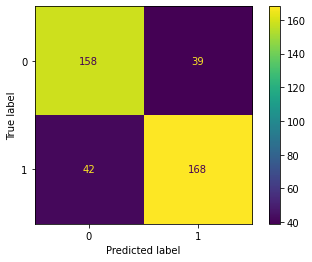

In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

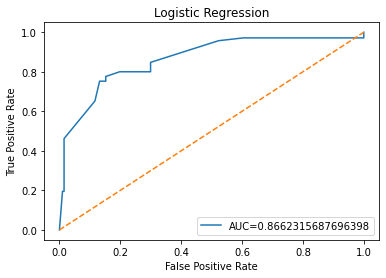

In [103]:
plt.plot(fpr,tpr,label="AUC="+str(logistic_auc))
plt.plot([0, 1], linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('Logistic Regression')
plt.show()